In [45]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [46]:
train_data = pd.read_csv("Resources/cleaned_train.csv")


In [47]:
train_data.shape

(714, 8)

In [48]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [49]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Attempt 1: Without Scaling and Binning

In [52]:
test = train_data.drop(labels='Survived', axis=1)

In [53]:
test.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [54]:
target = train_data['Survived']

target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(test, target, random_state=42)

In [56]:
X_train.shape

(535, 7)

In [62]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
649,2,0,35.0,0,0,10.5000,0
360,3,1,5.0,2,1,19.2583,1
518,3,1,32.0,1,1,15.5000,2
248,1,1,18.0,2,2,262.3750,1
344,1,0,28.0,0,0,26.5500,0


In [57]:
X_test.shape

(179, 7)

In [115]:
from sklearn.ensemble import RandomForestClassifier

#trying different number of trees in the random forests combinations and saving the result in a dictionary

d = {}

for i in np.arange(1,100):

    clf = RandomForestClassifier(n_estimators=i)
    clf_1 = clf.fit(X_train, y_train)
    d.update({i:clf_1.score(X_test,y_test)})



In [116]:
#finding the max and min scares

my_dict = d

key_max = max(my_dict.keys(), key=(lambda k: my_dict[k]))
key_min = min(my_dict.keys(), key=(lambda k: my_dict[k]))

print('Maximum Value: ',my_dict[key_max])
print('Minimum Value: ',my_dict[key_min])

Maximum Value:  0.8100558659217877
Minimum Value:  0.6871508379888268


In [117]:
a = [key for key,values in d.items() if values == d[key_max]]

print (a)

[65]


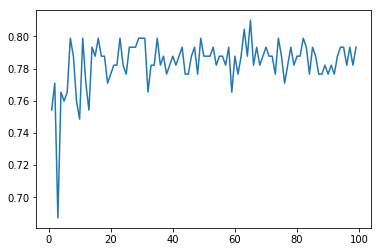

In [118]:
import matplotlib.pyplot as plt

#graph showing different efficiencies with different number of trees in the random forest model

plt.plot(my_dict.keys()  , my_dict.values())

# Attempt 2

In [107]:
#Attempt 2

#Create a scaler that scales the data down to a standard normal (Guassian) distribution (mean=0, standard deviation=1)
X_scaler = StandardScaler().fit(test)
X_scaled = X_scaler.transform(test)

In [108]:
display(X_scaled)

array([[ 0.91123237, -0.75905134, -0.53037664, ..., -0.50589515,
        -0.51897787, -0.5039785 ],
       [-1.47636364,  1.31743394,  0.57183099, ..., -0.50589515,
         0.69189675,  1.39994027],
       [ 0.91123237,  1.31743394, -0.25482473, ..., -0.50589515,
        -0.50621356, -0.5039785 ],
       ...,
       [-1.47636364,  1.31743394, -0.73704057, ..., -0.50589515,
        -0.08877362, -0.5039785 ],
       [-1.47636364, -0.75905134, -0.25482473, ..., -0.50589515,
        -0.08877362,  1.39994027],
       [ 0.91123237, -0.75905134,  0.15850313, ..., -0.50589515,
        -0.50952283,  3.30385904]])

In [76]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled, target, random_state=42)

In [127]:
d_2 = {}

for i in np.arange(1,100):

    clf = RandomForestClassifier(n_estimators=i)
    clf_1 = clf.fit(X_train_2, y_train_2)
    d_2.update({i:clf_1.score(X_test,y_test)})


In [150]:
#finding the max and min scares

#finding the max and min scares

my_dict_2 = d_2

key_max_2 = max(my_dict_2.keys(), key=(lambda k: my_dict_2[k]))
key_min_2 = min(my_dict_2.keys(), key=(lambda k: my_dict_2[k]))

print('Maximum Value: ',my_dict_2[key_max_2])
print('Minimum Value: ',my_dict_2[key_min_2])

Maximum Value:  0.7821229050279329
Minimum Value:  0.3240223463687151


In [136]:
max_tree = [key for key,values in d_2.items() if values == d_2[key_max_2]]

print (max_tree)

[85]


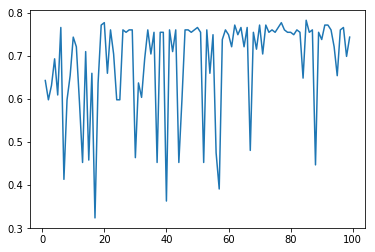

In [138]:
#graph showing different efficiencies with different number of trees in the random forest model

plt.plot(my_dict_2.keys()  , my_dict_2.values())

### Attempt - 3 (Only Scaling)

In [139]:
train_data.shape

(714, 8)

In [140]:
bins = [0,100,200,300,400,550]

fare_group_Cateogory = [0,1,2,3,4]

train_data['Fare'] = pd.cut(train_data['Fare'], bins, labels = fare_group_Cateogory)



In [141]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare        666
Embarked      0
dtype: int64

In [142]:
train_data_2 = train_data.dropna()

In [143]:
train_data_2.shape

#train_data_4.to_csv("AG_train-test_v2.csv")

(48, 8)

In [146]:
train_data_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
23,0,1,0,19.0,3,2,0,0
67,1,1,1,23.0,3,2,0,0
93,0,1,0,24.0,0,1,0,1
156,1,1,1,58.0,0,0,0,1
172,1,1,1,31.0,1,0,0,1


In [147]:
test_2 = train_data_2.drop(labels='Survived', axis=1)

target_2 = train_data_2['Survived']

test_2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
23,1,0,19.0,3,2,0,0
67,1,1,23.0,3,2,0,0
93,1,0,24.0,0,1,0,1
156,1,1,58.0,0,0,0,1
172,1,1,31.0,1,0,0,1


In [148]:
test_2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [100]:

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(test_2, target_2, random_state=42)

In [149]:
d_3 = {}

for i in np.arange(1,100):

    clf = RandomForestClassifier(n_estimators=i)
    clf_3 = clf.fit(X_train_3, y_train_3)
    d_3.update({i:clf_3.score(X_test,y_test)})

In [163]:
#finding the max and min scares

my_dict_3 = d_3

key_max_3 = max(my_dict_3.keys(), key=(lambda k: my_dict_3[k]))
key_min_3 = min(my_dict_3.keys(), key=(lambda k: my_dict_3[k]))

print('Maximum Value: ',my_dict_3[key_max_3])
print('Minimum Value: ',my_dict_3[key_min_3])


Maximum Value:  0.8268156424581006
Minimum Value:  0.43575418994413406


In [164]:
max_tree_3 = [key for key,values in d_3.items() if values == d_3[key_max_3]]

print (max_tree_3)

[6, 30, 58, 62]


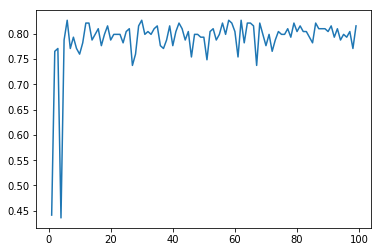

In [165]:
#graph showing different efficiencies with different number of trees in the random forest model

plt.plot(my_dict_3.keys()  , my_dict_3.values())